# Importing libraries and data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import graphviz
from sklearn import datasets
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.pyplot import figure

In [4]:
path = r'C:\Users\asicz\OneDrive\Dokumenty\CareerFoundry_Data_Analyst_Course\Machine Learning with Python\Achievement 1\Data Sets'

In [6]:
df = pd.read_csv(os.path.join(path, 'Dataset-weather-prediction-dataset-processed_scaled+month+date.csv'))
df_test = pd.read_csv(os.path.join(path,'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [8]:
df.head()

,Unnamed: 0,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,19600101,1,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,1,19600102,1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,2,19600103,1,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,3,19600104,1,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,4,19600105,1,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


# Prepare the data

In [11]:
# Keep only the temeprature data
temp_columns = [col for col in df.columns if col.endswith('_temp_mean')]
df_temp = df[temp_columns]
df_temp

,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,GDANSK_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,ROMA_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,TOURS_temp_mean,VALENTIA_temp_mean
0,-0.528623,-1.016876,-1.099163,-0.114356,-0.105836,-0.927601,-0.106469,-0.182904,-1.370824,-0.097084,-0.988280,-0.265742,-0.186575,-1.280450,-0.124331,-0.391072,-0.257321,-0.668215
1,-0.582946,-1.107669,-1.110927,-0.367511,-0.370915,-0.825294,-0.892676,-0.212437,-1.043881,-0.232112,-0.691740,-0.353714,-0.368598,-0.539569,-0.650834,-0.415953,-0.335759,-0.548046
2,-0.257010,-1.084971,-1.063873,-0.509912,-0.532908,-0.940389,-0.490837,-0.389635,-0.741156,-0.487164,-0.853490,-0.403983,-0.550620,-0.876333,-0.650834,-0.615003,-0.210258,-0.067372
3,-0.555784,-1.209812,-1.146217,-0.525734,-0.577088,-1.042696,-0.316124,-0.493001,-0.910682,-0.472161,-0.624345,-0.642763,-0.417137,-0.775304,-0.943336,-0.764290,-0.069069,-0.998679
4,-1.003946,-1.209812,-1.087400,-0.320045,-0.444548,-0.978754,-0.403481,-0.552067,-0.862246,-0.307127,-0.381721,-0.906678,-0.332193,-0.926848,-0.621584,-0.503037,-0.037694,-1.509396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,0.747959,0.628750,-0.005167,0.898267,1.042841,0.440753,0.906865,-0.005705,0.481853,1.268193,0.683127,0.664244,0.395898,-0.000746,0.826301,0.517090,1.295755,-0.007287
22946,0.856604,0.367720,-0.005167,0.945734,1.278467,0.466330,0.802037,-0.005705,0.263891,1.313202,0.561815,0.890456,0.541516,-0.000746,1.074927,0.641496,1.358505,-0.007287
22947,0.856604,0.083991,-0.005167,0.914089,1.101748,0.786039,0.924336,-0.005705,0.300218,1.208181,0.548336,1.053832,0.395898,-0.000746,1.221178,0.716139,1.405568,-0.007287
22948,0.680055,0.265577,-0.005167,0.692578,0.880848,0.376811,0.697210,-0.005705,0.397090,0.923123,0.103526,0.689378,-0.065226,-0.000746,1.235803,0.019467,0.668249,-0.007287


In [13]:
# Drop the month and date columns
df_test = df_test.drop(columns=['MONTH', 'DATE'], errors='ignore')
#df_org_filtered = df_org_filtered .drop(columns=['MONTH', 'DATE'], errors='ignore')
df_test

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
# Find missing weather stations in the answers dataset

def extract_prefixes(columns):
    return set(col.split('_')[0] for col in columns)

prefixes_df1 = extract_prefixes(df_temp.columns)
prefixes_df2 = extract_prefixes(df_test.columns)

# Compare the prefixes
missing_in_df2 = prefixes_df1 - prefixes_df2

print("Prefixes in df1 but NOT in df2:", missing_in_df2)

Prefixes in df1 but NOT in df2: {'ROMA', 'GDANSK', 'TOURS'}


In [19]:
# List of prefixes you want to remove
prefixes_to_remove = ['GDANSK', 'ROMA', 'TOURS']

# Filter out columns that start with any of the missing prefixes
df_filtered = df_temp[[col for col in df_temp.columns if not any(col.startswith(prefix) for prefix in prefixes_to_remove)]]
df_filtered.head()

,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,VALENTIA_temp_mean
0,-0.528623,-1.016876,-1.099163,-0.114356,-0.105836,-0.106469,-0.182904,-1.370824,-0.097084,-0.988280,-0.265742,-0.186575,-0.124331,-0.391072,-0.668215
1,-0.582946,-1.107669,-1.110927,-0.367511,-0.370915,-0.892676,-0.212437,-1.043881,-0.232112,-0.691740,-0.353714,-0.368598,-0.650834,-0.415953,-0.548046
2,-0.257010,-1.084971,-1.063873,-0.509912,-0.532908,-0.490837,-0.389635,-0.741156,-0.487164,-0.853490,-0.403983,-0.550620,-0.650834,-0.615003,-0.067372
3,-0.555784,-1.209812,-1.146217,-0.525734,-0.577088,-0.316124,-0.493001,-0.910682,-0.472161,-0.624345,-0.642763,-0.417137,-0.943336,-0.764290,-0.998679
4,-1.003946,-1.209812,-1.087400,-0.320045,-0.444548,-0.403481,-0.552067,-0.862246,-0.307127,-0.381721,-0.906678,-0.332193,-0.621584,-0.503037,-1.509396


# Run Decision Tree model

In [22]:
# Define X and y matrices
X = df_filtered
y = df_test

In [24]:
print(X.shape)
print(y.shape)

(22950, 15)
(22950, 15)


In [26]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [28]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 15)
(5738, 15)
(17212, 15)
(5738, 15)


[Text(0.37886934886091334, 0.9848484848484849, 'x[8] <= 0.376\ngini = 0.316\nsamples = 17212\nvalue = [[12948, 4264]\n[11182, 6030]\n[11619, 5593]\n[13854, 3358]\n[13509, 3703]\n[13421, 3791]\n[14361, 2851]\n[12379, 4833]\n[13622, 3590]\n[9535, 7677]\n[13637, 3575]\n[14492, 2720]\n[17212, 0]\n[14290, 2922]\n[16314, 898]]'),
 Text(0.11515017994614196, 0.9545454545454546, 'x[9] <= -0.281\ngini = 0.1\nsamples = 10533\nvalue = [[9904, 629]\n[8963, 1570]\n[9386, 1147]\n[10387, 146]\n[10252, 281]\n[9925, 608]\n[10372, 161]\n[9675, 858]\n[10371, 162]\n[8015, 2518]\n[10179, 354]\n[10307, 226]\n[10533, 0]\n[10323, 210]\n[10376, 157]]'),
 Text(0.05051249024906493, 0.9242424242424242, 'x[2] <= 0.13\ngini = 0.036\nsamples = 7471\nvalue = [[7332.0, 139.0]\n[6811.0, 660.0]\n[7118.0, 353.0]\n[7426.0, 45.0]\n[7390.0, 81.0]\n[7407.0, 64.0]\n[7409.0, 62.0]\n[7243.0, 228.0]\n[7418.0, 53.0]\n[7252.0, 219.0]\n[7318.0, 153.0]\n[7435.0, 36.0]\n[7471.0, 0.0]\n[7438.0, 33.0]\n[7459.0, 12.0]]'),
 Text(0.0290069

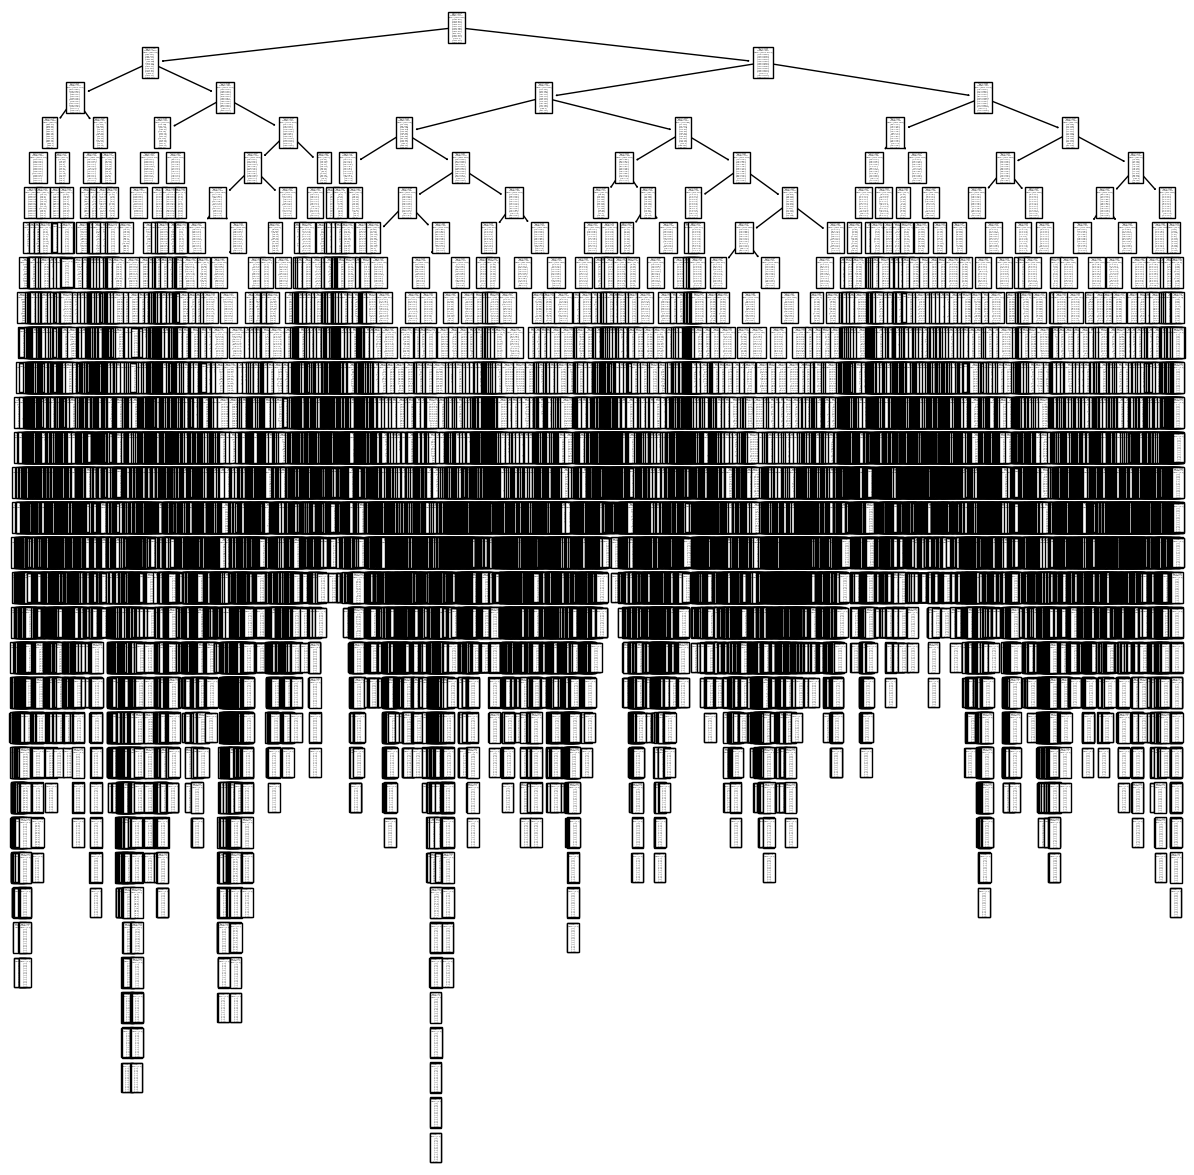

In [30]:
#Run Decision Tree classifier
weather_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
weather_dt.fit(X_train, y_train)
figure(figsize=(15,15))
tree.plot_tree(weather_dt)

In [36]:
#What is the training accuracy score? Using the cross validation method
y_pred_train = weather_dt.predict(X_train)
print('Train accuracy score: ',cross_val_score(weather_dt, X_train, y_train, cv = 3, scoring='accuracy').mean())

Train accuracy score:  0.3983847559616147


C:\Users\asicz\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


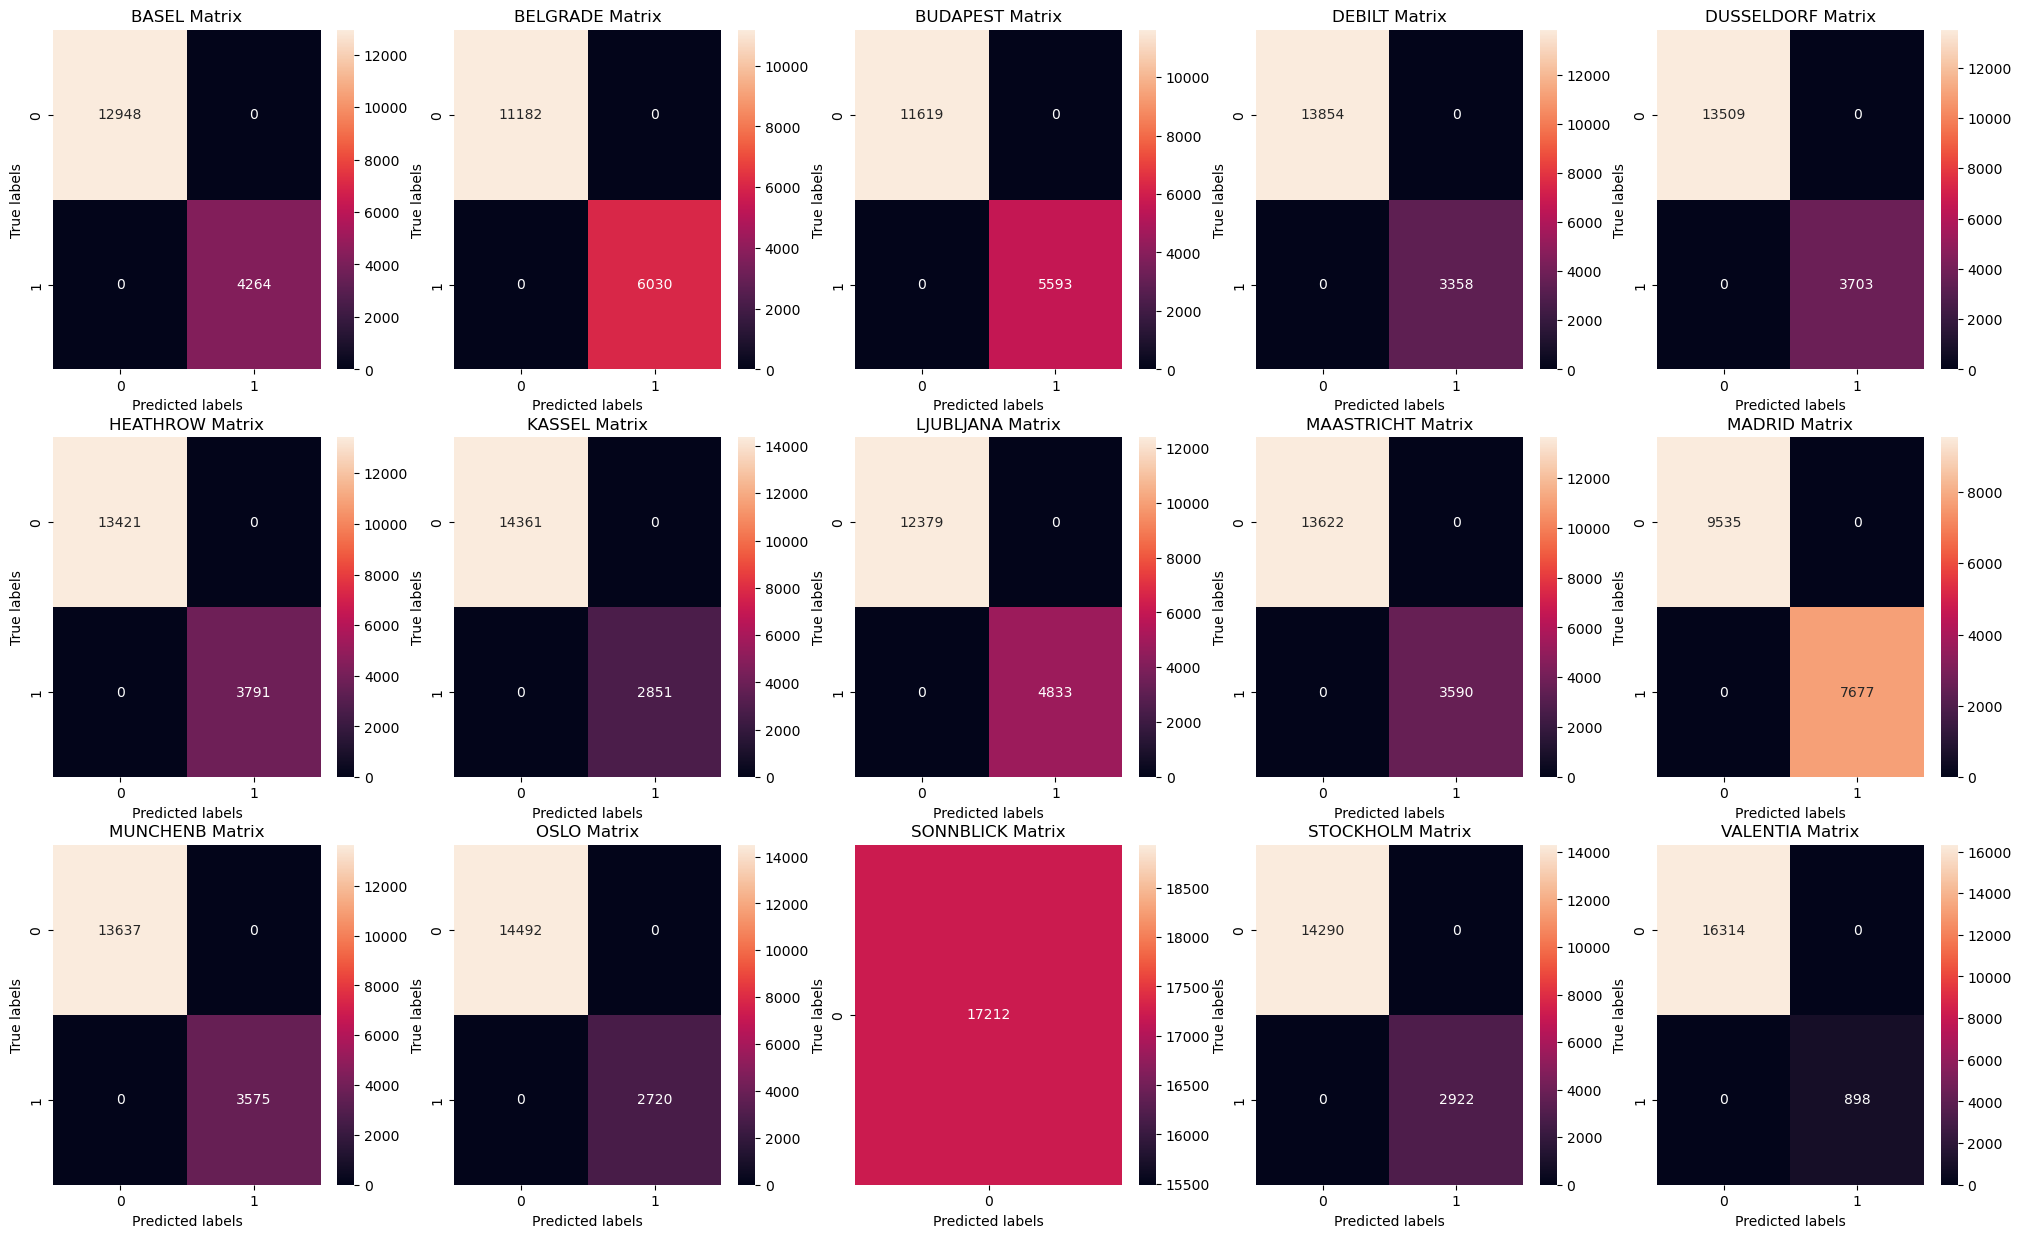

In [48]:
# Create confusion matrix
locations = list({x.split("_")[0] for x in df_filtered.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:, name + key], y_pred_train[:, count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [40]:
#What is the testing accuracy score? Using the cross validation method
y_pred = weather_dt.predict(X_test)
print('Test accuracy score: ',accuracy_score(y_test, y_pred))
multilabel_confusion_matrix(y_test, y_pred)

Test accuracy score:  0.40536772394562565


array([[[3768,  570],
        [ 576,  824]],

       [[3128,  648],
        [ 622, 1340]],

       [[3350,  550],
        [ 573, 1265]],

       [[4142,  495],
        [ 473,  628]],

       [[3946,  561],
        [ 548,  683]],

       [[3950,  620],
        [ 537,  631]],

       [[4399,  416],
        [ 413,  510]],

       [[3553,  642],
        [ 558,  985]],

       [[4046,  516],
        [ 511,  665]],

       [[2685,  483],
        [ 520, 2050]],

       [[4065,  481],
        [ 520,  672]],

       [[4472,  407],
        [ 384,  475]],

       [[5738,    0],
        [   0,    0]],

       [[4380,  386],
        [ 364,  608]],

       [[5247,  215],
        [ 197,   79]]], dtype=int64)

C:\Users\asicz\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


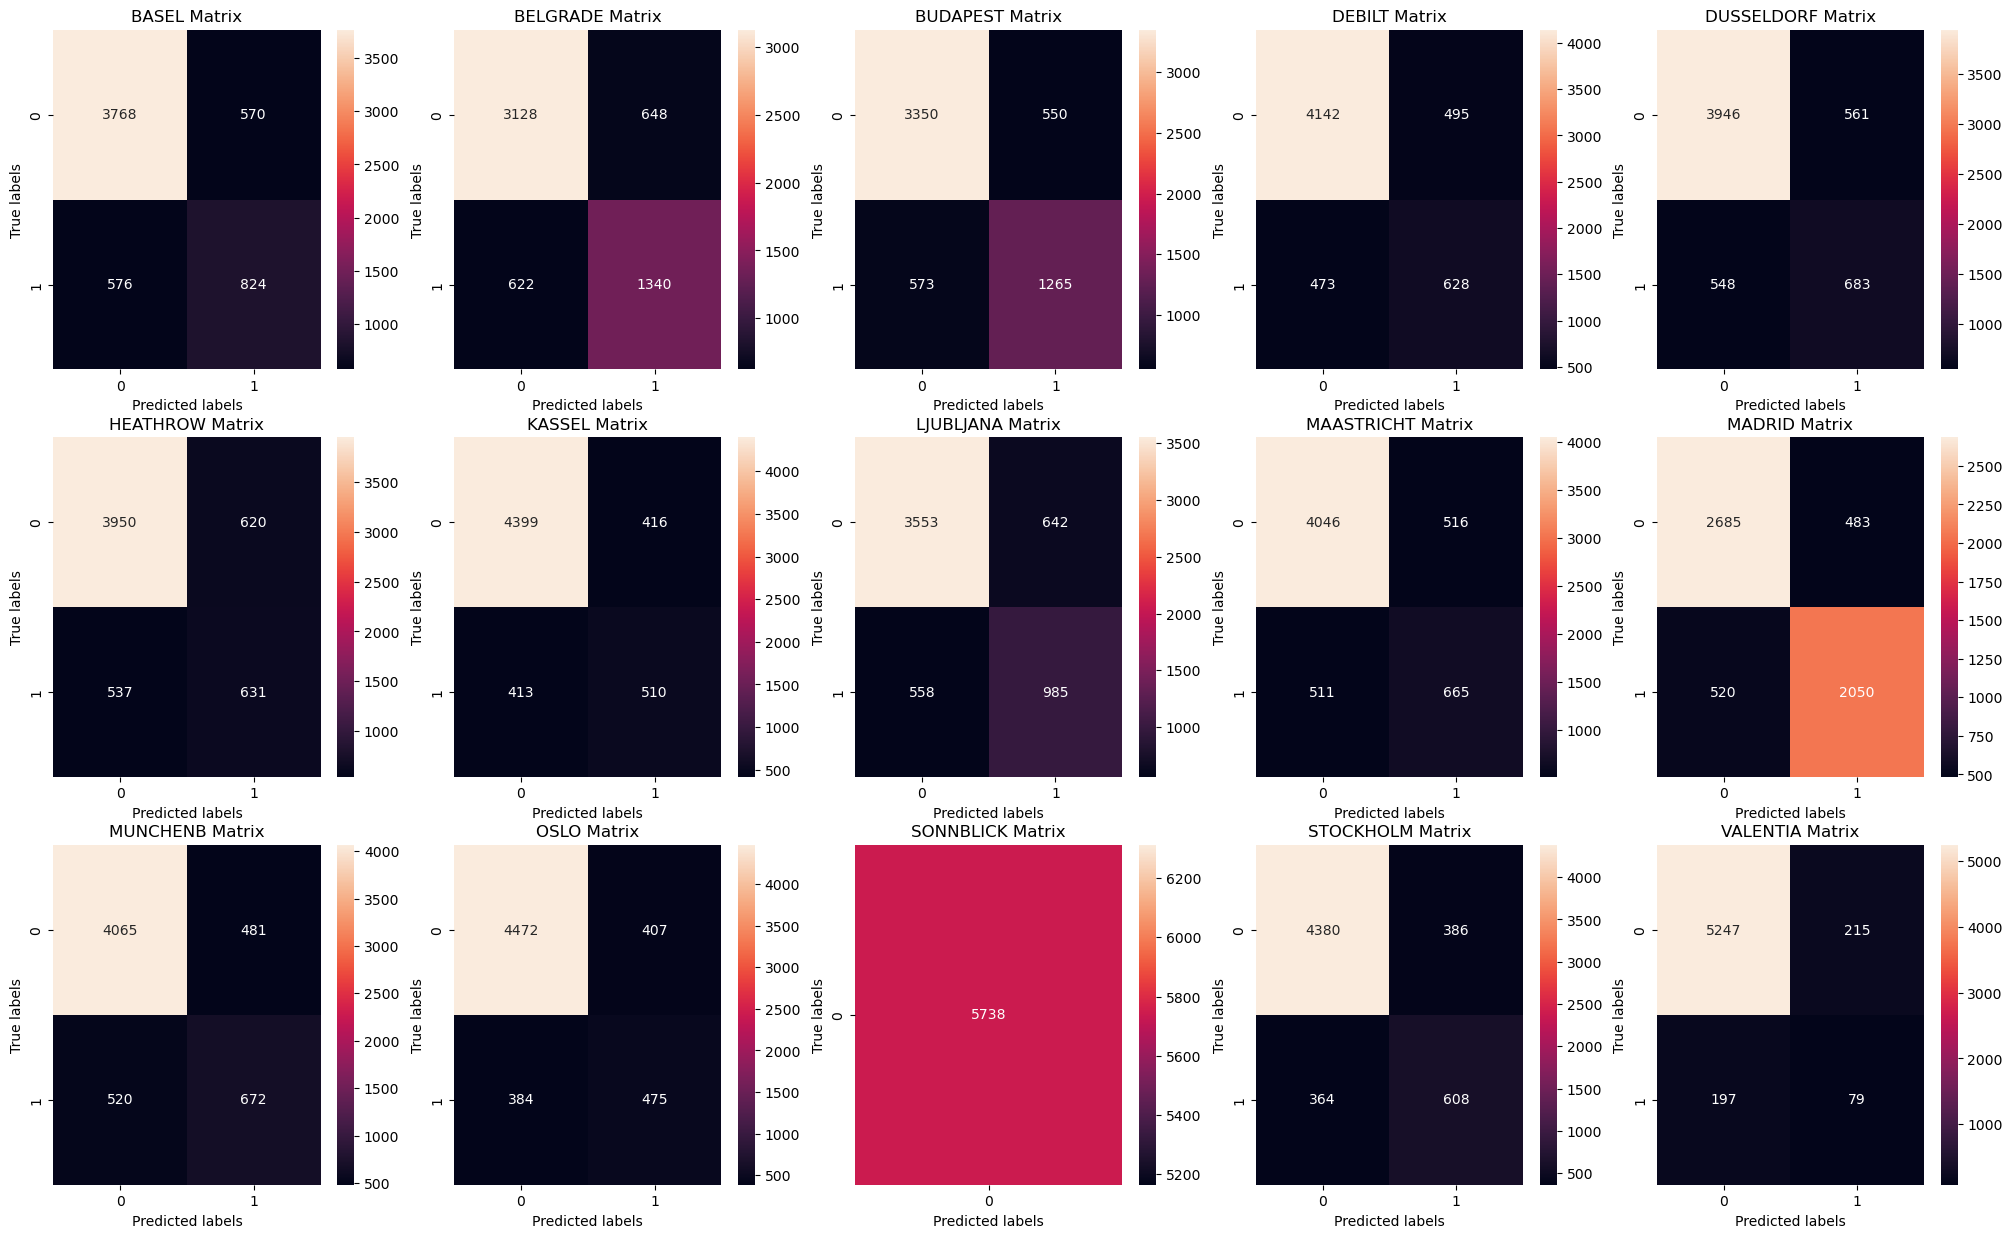

In [42]:
# Create confusion matrix
locations = list({x.split("_")[0] for x in df_filtered.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1